---
Some useful $\LaTeX$ commands are defined in this cell:
$$
\newcommand{\abs}[1]{\left\lvert#1\right\rvert}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\paren}[1]{\left(#1\right)}
\newcommand{\brack}[1]{\left[#1\right]}
\newcommand{\ip}[2]{\left\langle#1,#2\right\rangle}
\DeclareMathOperator{\span}{span}
\DeclareMathOperator{\fl}{fl}
\abs{x}, \norm{x}, \set{x}, \paren{x}, \brack{x}, \ip{x}{y}, \span, \fl
$$

---

---
# 14.4 Roundoff and data errors in numerical differentiation
---

In the examples above we have seen that the actual error degrades when $h$ becomes too small due to roundoff error.

This is happening since, in each of the formulas we have looked at, we are subtracting values that are very nearly equal, leading to **catastrophic cancellation** and a significant loss of precision.

In [1]:
x0 = 1.0
h = 1e-8
y1 = sin(x0 + h)
y2 = sin(x0)
println(y1)
println(y2)
println(y1 - y2)

0.8414709902109195
0.8414709848078965
5.403023028982545e-9


In [2]:
println(bitstring(y1)[13:end])
println(bitstring(y2)[13:end])
println(bitstring(y1-y2)[13:end])

1010111011010101010010010001111011111010001011100111
1010111011010101010010001111000010010000110011101110
0111001101001010111111001000000000000000000000000000


---

### Recall:

The error for the **centered divided difference** satisfies:

$$\abs{f'(x_0) -  \frac{f(x_0 + h) - f(x_0 - h)}{2h}} = \frac{h^2}{6}\abs{f'''(\xi)}, \quad \text{for some $\xi \in (x_0-h,x_0+h).$}$$

Thus, when $f'''(x_0) \neq 0$, we have that

$$\abs{f'(x_0) -  \frac{f(x_0 + h) - f(x_0 - h)}{2h}} \approx \frac{h^2}{6}\abs{f'''(x_0)}, \quad \text{for $h > 0$ small.}$$

---

### Example:

We will use the function 

$$f(x) = e^x \sin(3x)$$

for the numerical examples in this section.

In [3]:
f(x)  = exp(x)*(                sin(3x))
f1(x) = exp(x)*(  3cos(3x) +    sin(3x))
f2(x) = exp(x)*(  6cos(3x) -   8sin(3x))
f3(x) = exp(x)*(-18cos(3x) -  26sin(3x))
f4(x) = exp(x)*(-96cos(3x) +  28sin(3x))
f5(x) = exp(x)*(-12cos(3x) + 316sin(3x))

f5 (generic function with 1 method)

---

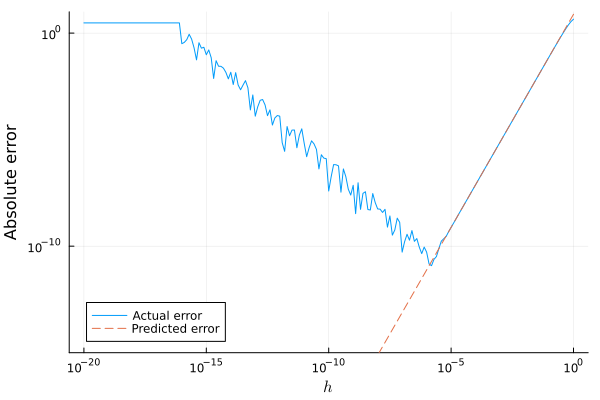

In [4]:
using Plots, LaTeXStrings

x0 = 0.4
h = [10.0^-i for i=0:0.1:20]
approxfp = (f.(x0.+h) - f.(x0.-h))./(2h)
err = abs.(f1(x0) .- approxfp)
p_err = h.^2*abs(f3(x0))/6

plot(legend=:bottomleft, xaxis=:log, yaxis=:log,
    xlabel=L"h", ylabel="Absolute error", ylims=(1e-15, 1e1))
plot!(h, err, label="Actual error")
plot!(h, p_err, ls=:dash, label="Predicted error")

---

We can see the effect of roundoff error on the approximation error.

It would be nice to know what is the **optimal value** of $h$. In this example, it appears that the best $h$ is around $10^{-6}$.

---

## Analyzing the roundoff error

Let $\bar{f}(x) \equiv \fl(f(x))$, and define

$$
D_h = \frac{f(x_0 + h) - f(x_0 - h)}{2h}, \qquad 
\bar{D}_h = \frac{\bar{f}(x_0 + h) - \bar{f}(x_0 - h)}{2h}.
$$

Define the **roundoff error in the calculation of $f$** as

$$e_r(x) = \bar{f}(x) - f(x)$$

and suppose that $\abs{e_r(x)} \leq \varepsilon$, where $\varepsilon$ is some small multiple of the **unit-roundoff** $\eta$ (recall that $\eta \approx 1.1 \times 10^{-16}$ for `Float64`).

In [6]:
η = eps(Float64)/2

1.1102230246251565e-16

Also, suppose that $\abs{f'''(\xi)} \leq M$, for all $\xi \in (x_0 - h, x_0 + h)$. Thus,

$$\abs{f'(x_0) - D_h} = \frac{h^2}{6}\abs{f'''(\xi)} \leq  \frac{h^2M}{6}.$$

Then

$$
\begin{split}
\abs{f'(x_0) - \bar{D}_h}
&= \abs{f'(x_0) - D_h + D_h - \bar{D}_h} \\
&\leq \abs{f'(x_0) - D_h} + \abs{D_h - \bar{D}_h} \\
&\leq  \frac{h^2M}{6} + \abs{D_h - \bar{D}_h}. \\
\end{split}
$$

Now let's bound $\abs{D_h - \bar{D}_h}$. We have

$$
\begin{split}
\abs{D_h - \bar{D}_h}
&= \abs{ \frac{f(x_0 + h) - f(x_0 - h)}{2h} - \frac{\bar{f}(x_0 + h) - \bar{f}(x_0 - h)}{2h} } \\
&= \frac{1}{2h}\abs{ f(x_0 + h) - f(x_0 - h) - \bar{f}(x_0 + h) + \bar{f}(x_0 - h) } \\
&= \frac{1}{2h}\abs{ e_r(x_0 - h) - e_r(x_0 + h) } \\
&\leq \frac{1}{2h}\paren{\abs{ e_r(x_0 - h)} + \abs{ e_r(x_0 + h) }} \\
&\leq \frac{1}{2h} 2\varepsilon \\
&\leq \frac{\varepsilon}{h}. \\
\end{split}
$$

Therefore,

$$\abs{f'(x_0) - \bar{D}_h} \leq \frac{h^2M}{6} + \frac{\varepsilon}{h}.$$

Initially, when $h$ is rather large, the roundoff error term $\frac{\varepsilon}{h}$ will be much smaller than the approximation error (a.k.a. **truncation error**) term $\frac{h^2M}{6}$.

However, as $h$ becomes small, $\frac{\varepsilon}{h}$ eventually becomes larger than $\frac{h^2M}{6}$.

---

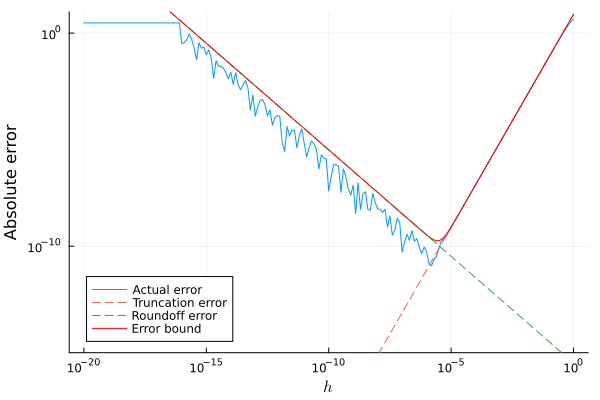

In [7]:
x0 = 0.4

ɛ = 3η  # Played around with the multiple to 
        # obtain a valid bound

M = abs(f3(x0))

h = [10.0^-i for i=0:0.1:20]
approxfp = (f.(x0.+h) - f.(x0.-h))./(2h)
err = abs.(f1(x0) .- approxfp)
p_err = h.^2*M/6
r_err = ɛ./h

plot(legend=:bottomleft, xaxis=:log, yaxis=:log,
    xlabel=L"h", ylabel="Absolute error", ylims=(1e-15, 1e1))
plot!(h, err, label="Actual error")
plot!(h, p_err, ls=:dash, label="Truncation error")
plot!(h, r_err, ls=:dash, label="Roundoff error")
plot!(h, p_err + r_err, label="Error bound", c=:red)

---

## The "optimal" $h$ for the centered divided difference formula

Define

$$E(h) = \frac{h^2M}{6} + \frac{\varepsilon}{h}.$$

We want to find the minimum value of $E(h)$. First we solve $E'(h) = 0$ to find the critical points:

$$E'(h) = \frac{hM}{3} - \frac{\varepsilon}{h^2} = 0 \quad \implies \quad h^3 = \frac{3\varepsilon}{M} \quad \implies \quad h = \sqrt[3]{\frac{3\varepsilon}{M}}.$$

In [9]:
h = cbrt(3ε/M)

2.792571230371323e-6

Next, we check if this critical point is a local minimizer or maximizer:

$$E''(h) = \frac{M}{3} + \frac{2\varepsilon}{h^3} \quad \implies \quad E''\paren{\sqrt[3]{\frac{3\varepsilon}{M}}} = \frac{M}{3} + \frac{2\varepsilon}{\frac{3\varepsilon}{M}} = M > 0.$$

Thus, the critical point $h = \sqrt[3]{\frac{3\varepsilon}{M}}$ is a local minimizer, and the local minimum is

$$E\paren{\sqrt[3]{\frac{3\varepsilon}{M}}} = \frac12  \sqrt[3]{M} (3\varepsilon)^{\frac{2}{3}}.$$

In [10]:
E(h) = h^2*M/6 + ε/h
E(h)

1.789033546030228e-10

---

optimal h = 2.79e-06
Emin = 1.79e-10


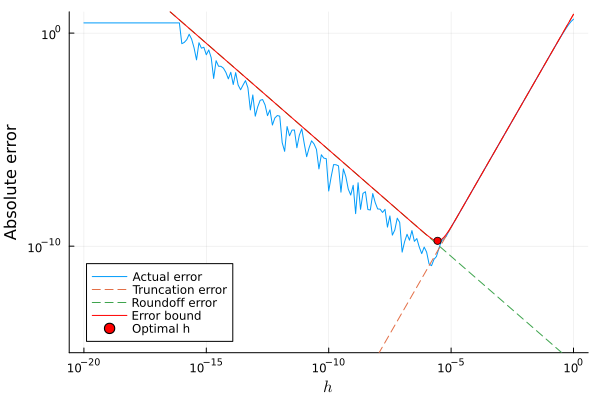

In [11]:
using Printf

x0 = 0.4

ɛ = 3η  # Played around with the multiple to obtain a valid bound
M = abs(f3(x0))

h = [10.0^-i for i=0:0.1:20]
approxfp = (f.(x0.+h) - f.(x0.-h))./(2h)
err = abs.(f1(x0) .- approxfp)
p_err = h.^2*M/6
r_err = ɛ./h

hopt = cbrt(3ɛ/M)
Emin = .5cbrt(M)*(3ɛ)^(2/3)

plt = plot(legend=:bottomleft, xaxis=:log, yaxis=:log,
    xlabel=L"h", ylabel="Absolute error", ylims=(1e-15, 1e1))
plot!(h, err, label="Actual error")
plot!(h, p_err, ls=:dash, label="Truncation error")
plot!(h, r_err, ls=:dash, label="Roundoff error")
plot!(h, p_err + r_err, label="Error bound", c=:red)
scatter!([hopt], [Emin], label="Optimal h", c=:red)

@printf "optimal h = %.2e\n" hopt
@printf "Emin = %.2e\n" Emin

plt

---

### Advice on choosing $h$

Since the values of $\varepsilon$ and $M$ are typically unknown, it is usually not possible to know the optimal value of $h$.

Thus, we should choose a value of $h$ that is well above the point where roundoff error begins to corrupt our calculation.

That is, we should choose $h$ so that the truncation error is much larger than the roundoff error.

In the above example, using $h$ between $10^{-5}$ and $10^{-4}$ would be best.

In general, if the order of accuracy is $q$, then choose

$$h > \eta^{1/(q+1)}.$$

In [12]:
η^(1/3)

4.806217383937355e-6

In [13]:
x0 = .4

@printf "%5s %14s %12s\n" "h" "approx" "error"
for i = 0:8
    h = 10.0^-i
    approx = (f(x0+h) - f(x0-h))/(2h)
    err = abs(approx - f1(x0))
    @printf "%5.0e %14.10f %12.5e\n" h approx err
end

abs(f3(x0))/6

    h         approx        error
1e+00  -1.4999775659  4.51214e+00
1e-01   2.9360523683  7.61093e-02
1e-02   3.0113970104  7.64660e-04
1e-03   3.0121540232  7.64695e-06
1e-04   3.0121615937  7.64704e-08
1e-05   3.0121616694  7.63182e-10
1e-06   3.0121616701  5.26392e-11
1e-07   3.0121616701  5.26392e-11
1e-08   3.0121616645  5.60375e-09


7.646958095519647

---

## Numerical differentiation of noisy data

Numerical differentiation is very sensitive to small changes in the input since it is an **ill-conditioned** problem.

In the following numerical test, we will see that just a small amount of noise in the function values can create large errors in the approximation of its derivative.

---

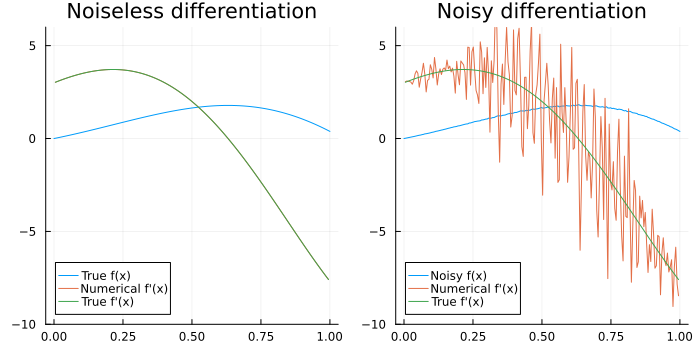

In [25]:
nf = .01  # noise factor = 1%
n = 200

xx = range(0, 1, length=n)
h = xx[2] - xx[1]

yy = f.(xx) # Noiseless data
yyp = (yy[3:n] .- yy[1:n-2])./(2h)  # centered divided difference

yyn = (1 .+ nf*randn(size(yy))).*yy  # add noise to function values
yynp = (yyn[3:n] .- yyn[1:n-2])./(2h) # centered divided difference

yyptrue = f1.(xx[2:n-1]) # True derivative

# Create 2x1 array of subplots
plt = plot(layout=(1,2), size=(700,350), legend=:bottomleft, ylim=(-10,6))

plot!(subplot=1, title="Noiseless differentiation")
plot!(xx, yy, label="True f(x)")
plot!(xx[2:n-1], yyp, label="Numerical f'(x)")
plot!(xx[2:n-1], yyptrue, label="True f'(x)")

plot!(subplot=2, title="Noisy differentiation")
plot!(xx, yyn, label="Noisy f(x)", subplot=2)
plot!(xx[2:n-1], yynp, label="Numerical f'(x)", subplot=2)
plot!(xx[2:n-1], yyptrue, label="True f'(x)", subplot=2)

In [16]:
n = 200

xx = range(0, 1, length=n)
h = xx[2] - xx[1]

yy = f.(xx)
yyptrue = f1.(xx[2:n-1])

@printf "%10s %16s\n" "noise (%)" "max rel err (%)"
for i = -8:-1
    nf = 10.0^i
    
    yyn = (1 .+ nf*randn(size(yy))).*yy  # add noise to function values
    yynp = (yyn[3:n] .- yyn[1:n-2])./(2h) # centered divided difference
    
    maxrelerr = maximum(abs.(yyptrue .- yynp)./abs.(yyptrue))

    @printf "%10.6f %16.2f\n" nf*100 maxrelerr*100

end

 noise (%)  max rel err (%)
  0.000001             0.36
  0.000010             0.43
  0.000100             0.36
  0.001000             8.62
  0.010000            55.44
  0.100000           843.33
  1.000000          3510.01
 10.000000         24984.59


---

However, there are techniques for numerically differentiating noisy data, such as the **total-variation regularization** technique used in:

> [Numerical Differentiation of Noisy, Nonsmooth Data](http://dx.doi.org/10.5402/2011/164564), Rick Chartrand, ISRN Applied Mathematics (2011).

The idea is to minimize the total-variation of the derivative while ensuring that the integral of the derivative fits the original function well (in the least-squares sense). Thus, the numerical derivative is smoothed-out and does not vary as much, so is less affected by the noise.

---